#### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

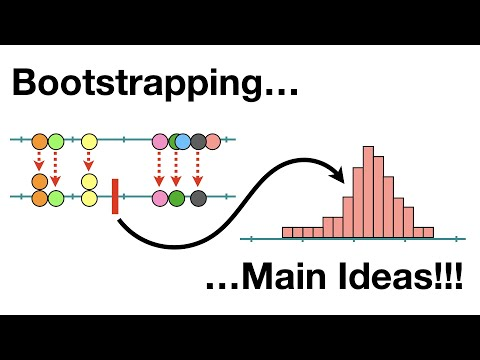

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

- Bootstrapping:
    - Make a bootstrapped dataset
    - calculate something
    - Keep track of the calculation
    - Repeat
- Standard error of the mean: 
    - The standard error of the mean refers to the chance of variability across multiple samples.
- Standard deviation: 
    - The standard deviation usually is the variability within one datasets mean. 

#### 4.The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

95% Bootstrap Confidence Interval for the Mean: (4125.671921921922, 4293.250750750751)


TypeError: Figure.show() got an unexpected keyword argument 'renderer'

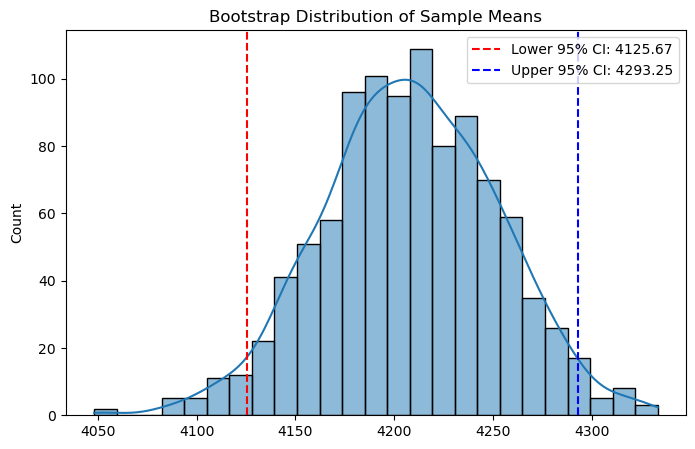

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (e.g., penguins dataset from Seaborn)
data = sns.load_dataset("penguins").dropna()["body_mass_g"].values  # Example sample

# Function to compute bootstrap confidence interval for a population mean
def bootstrap_ci(data, num_bootstrap_samples=1000, ci_level=95, stat_function=np.mean):
    """
    data: The sample data
    num_bootstrap_samples: The number of bootstrap samples to draw
    ci_level: Confidence interval level (e.g., 95 for 95% CI)
    stat_function: Function for the population statistic (e.g., np.mean or np.median)
    """
    # Bootstrap resampling
    bootstrap_samples = np.random.choice(data, (num_bootstrap_samples, len(data)), replace=True)
    
    # Compute the statistic (e.g., mean) for each bootstrap sample
    bootstrap_stat = np.apply_along_axis(stat_function, axis=1, arr=bootstrap_samples)
    
    # Compute confidence interval percentiles
    lower_bound = np.percentile(bootstrap_stat, (100 - ci_level) / 2)
    upper_bound = np.percentile(bootstrap_stat, 100 - (100 - ci_level) / 2)
    
    return lower_bound, upper_bound

# Get a 95% CI for the mean of the sample
mean_ci = bootstrap_ci(data, num_bootstrap_samples=1000, ci_level=95, stat_function=np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# Plot the distribution of bootstrap means


plt.figure(figsize=(8, 5))
sns.histplot(np.random.choice(data, (1000, len(data)), replace=True).mean(axis=1), kde=True)
plt.title("Bootstrap Distribution of Sample Means")
plt.axvline(mean_ci[0], color='red', linestyle='--', label=f'Lower 95% CI: {mean_ci[0]:.2f}')
plt.axvline(mean_ci[1], color='blue', linestyle='--', label=f'Upper 95% CI: {mean_ci[1]:.2f}')
plt.legend()
fig.show(renderer="png")

In [1]:
# To calculate the bootstrap confidence interval for the median, replace np.mean with np.median in the stat_function parameter:
# To get a 95% CI for the median of the sample

median_ci = bootstrap_ci(data, num_bootstrap_samples=1000, ci_level=95, stat_function=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")

NameError: name 'bootstrap_ci' is not defined

#### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
- What is the process of bootstrapping?
- What is the main purpose of bootstrapping?
- If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1. Bootstrapping is just a way to roughly estimate the distribution of some data of a set of statistics by resampling the data over and over again. The process for how this works is that first you start with the data that you want to calculate something like a mean or median, and then you keep on resampling over and over again the original set of data. While you are resampling the data, after each trial you want to calculate the statistic you are trying to get (like the mean or median). After enough repetitions you'll eventually get a distribution of the data that can estimate the uncertaintiy of the original statistic. 

2. The main purpose of a bootstrap is to, while minimizing resources in the sense that it can allow us to estimate variability using just the data you already, estimate the variability or uncertainty of a statistic. Bootstrapping also allows the user to assess the reliability of the statistic, and roughly estimate what would happen if the trial were to take place many more times. 

3. If we have a sample n, we can start by guessing a educated guess of what the average of the population I am considering, then sampling through n with replacement to get a bunch of sample sets that are a bit different than one another. For each of these sets, we want to get the mean (because the mean is the central point of your sample data its the best estimate of the population's average). After doing this, we can compare the guess that we made originally to the bootstrapped mean that we got. Because that way, we can tell if our guess is outside or inside the range that we made. If the guess we made is outside of the range (which can be like a confidence interval that we pick ex: 95% interval), then our guess would probably be less likely to be plausible, whereas if our guess was within the range then it means the guess could be plausible because its consistent with the mean we got. 

#### 8. Complete the following assignment.

Vaccine Data Analysis Assignment
- Overview

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

Data AliTech has released the following data.



csv
- PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
- 1,45,M,84,86
- 2,34,F,78,86
- 3,29,M,83,80
- 4,52,F,81,86
- 5,37,M,81,84
- 6,41,F,80,86
- 7,33,M,79,86
- 8,48,F,85,82
- 9,26,M,76,83
- 10,39,F,83,84

- Deliverables While you can choose how to approach this project, the most obvious path would be to use bootstrapping, follow the analysis presented in the "Pre-lecture" HW video (above). Nonetheless, we are primarily interested in evaluating your report relative to the following deliverables.

1. A visual presentation giving some initial insight into the comparison of interest.

TypeError: Figure.show() got an unexpected keyword argument 'renderer'

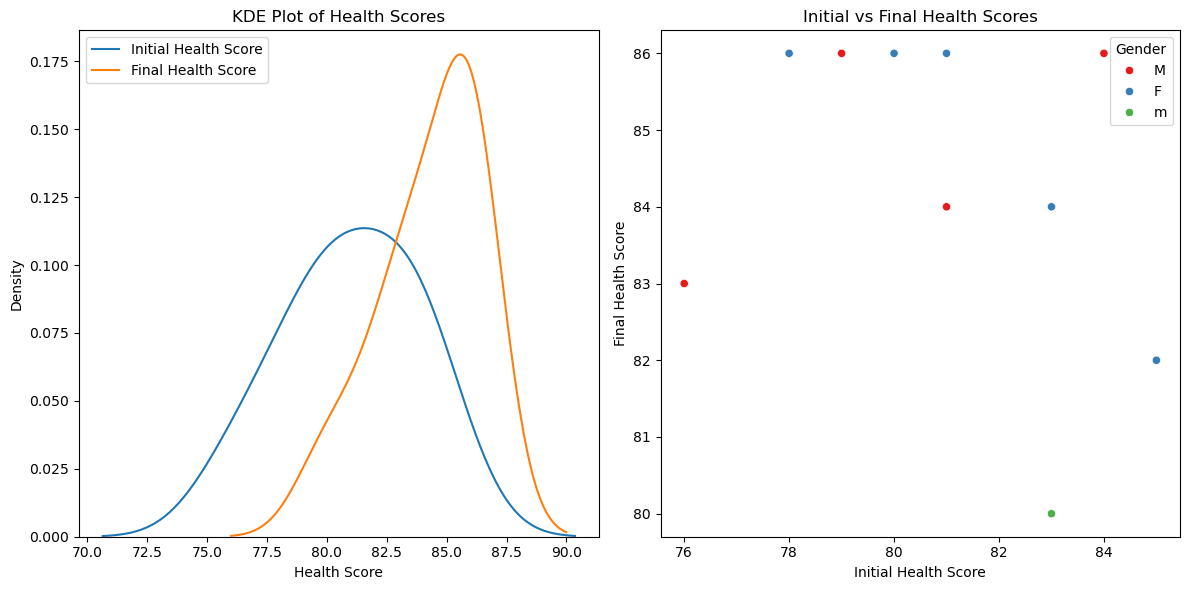

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('csv file - Sheet1.csv')

# Set up the figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# KDE plot for Initial and Final Health Scores (without fill)
sns.kdeplot(df['InitialHealthScore'], label='Initial Health Score', ax=axes[0])
sns.kdeplot(df['FinalHealthScore'], label='Final Health Score', ax=axes[0])
axes[0].set_title('KDE Plot of Health Scores')
axes[0].set_xlabel('Health Score')
axes[0].set_ylabel('Density')
axes[0].legend()

# Scatter plot for Initial vs Final Health Scores
sns.scatterplot(x=df['InitialHealthScore'], y=df['FinalHealthScore'], hue=df['Gender'], palette='Set1', ax=axes[1])
axes[1].set_title('Initial vs Final Health Scores')
axes[1].set_xlabel('Initial Health Score')
axes[1].set_ylabel('Final Health Score')

# Show the plot
plt.tight_layout()
fig.show(renderer="png")

2. A quantitative analysis of the data and an explanation of the method and purpose of this method.

The dataset consists of health scores from 10 patients, measured before and after receiving the vaccine. The relevant columns are:

- InitialHealthScore: The health score of the patient before receiving the vaccine.
- FinalHealthScore: The health score of the patient after receiving the vaccine.

Method: Paired T-Test

A paired t-test is a statistical method used to compare the means of two related groups. In this analysis, the two related groups are:

1. The initial health scores of patients before vaccination.
2. The final health scores of patients after vaccination.

Purpose of the Paired T-Test: 

1. Comparison of Means: The paired t-test determines if there is a significant difference between the means of the two related groups (before and after vaccination).
2. Control for Individual Differences: Since the same patients are measured twice (before and after), this method controls for individual variability, making it a powerful way to assess treatment effects.

3. A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.

The null hypothesis (H0) posited that there is no effect of the vaccine on health scores, meaning that the mean difference between initial health scores (before vaccination) and final health scores (after vaccination) is equal to zero. 

After conducting the paired t-test, we obtained the following results:

- T-statistic: x
- P-value: y

If the p-value is less than the significance level of 0.05, we reject the null hypothesis. This indicates that there is sufficient statistical evidence to conclude that the vaccine has a significant effect on improving health scores.

Conversely, if the p-value is greater than 0.05, we fail to reject the null hypothesis, implying that there is no significant difference in health scores before and after vaccination.